## Anaysing Book Preferences with SQL

The coronavirus took the entire world by surprise, changing everyone's daily routine. City dwellers no longer spent their free time outside, going to cafes and malls; more people were home, reading books. That attracted the attention of startups that rushed to develop new apps for book lovers.

I've been given a database of one of the services competing in this market. The ultimate goals is to use this information to generate a value proposition for a new product. The database contains data on books, publishers, authors, and customer ratings and reviews of books:

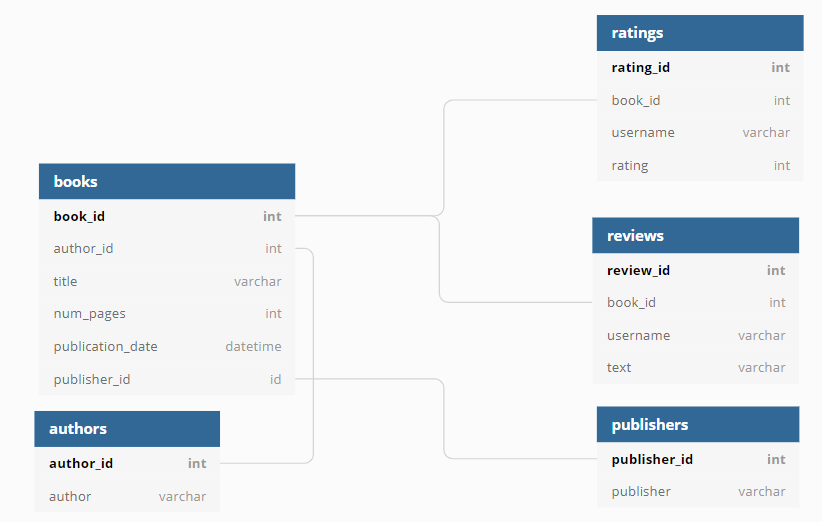



## Content <a id='content'></a>

[Introduction](#intro)

[Dataset](#dataset)

[Data overview](#data_overview)

[Research queries](#preprocessing)

[Summary and conclusions](#conclusions)

## Introduction <a id = "intro"> <a/>

The ultimate goal stated for the project is to generate a value proposition for a new product; to support this goal we will study the data:

- Study the tables (print the first rows).
- Make an SQL query for each of the tasks below.
- Output the results of each query in the Notebook.
- Describe your conclusions for each of the tasks.

### Tasks

We have been asked to run the following queries:

- Find the number of books released after January 1, 2000.
- Find the number of user reviews and the average rating for each book.
- Identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude brochures and similar publications from your analysis).
- Identify the author with the highest average book rating (look only at books with at least 50 ratings).
- Find the average number of text reviews among users who rated more than 50 books.

[Back to Content](#content)

## Dataset <a id='dataset'> <a/>

At our disposal, we have a database with five tables:

- **books** - contains data on books:

    - `book_id`
    - `author_id`
    - `title`
    - `num_pages` 
    - `publication_date`
    - `publisher_id`

- **authors** - contains data on authors:

    - `author_id`
    - `author`

- **publishers** - contains data on publishers:

    - `publisher_id`
    - `publisher`

- **ratings** - contains data on user ratings:

    - `rating_id`
    - `book_id`
    - `username` - the name of the user who rated the book
    - `rating`
    
- **reviews** - contains data on customer reviews:

    - `review_id`
    - `book_id`
    - `username` - the name of the user who reviewed the book
    - `text` - the text of the review

Let's connect to the database and start.

### Connecting to the Data Base

In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine


db_config = {'user': 'praktikum_student',         # user name
             'pwd': 'Sdf4$2;d-d30pp', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the data base

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

Now we can run regular SQL queries in the following form:

    pd.io.sql.read_sql(query, con = engine)

[Back to Content](#content)

## Data overview <a id='data_overview'> <a/>

Let's study the tables. We will employ a simpe function to make the querying easier:

In [2]:
def query(query_string):
    return pd.io.sql.read_sql(query_string, con = engine)



### Books

In [3]:
books_q1 = 'SELECT * FROM books'

In [4]:
query(books_q1)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
...,...,...,...,...,...,...
995,996,571,Wyrd Sisters (Discworld #6; Witches #2),265,2001-02-06,147
996,997,454,Xenocide (Ender's Saga #3),592,1996-07-15,297
997,998,201,Year of Wonders,358,2002-04-30,212
998,999,94,You Suck (A Love Story #2),328,2007-01-16,331


<font color='green'>C1. There are 1000 items in the `books` table.</font>

In [5]:
books_q2 = 'SELECT MIN(publication_date) AS earlies_book_date FROM books'

In [6]:
query(books_q2)

,earlies_book_date
0,1952-12-01


In [7]:
books_q3 = '''SELECT title as earliest_book_title, publication_date FROM books
                WHERE publication_date =
                (SELECT MIN(publication_date) AS earlies_book_date FROM books)'''

In [8]:
query(books_q3)

,earliest_book_title,publication_date
0,A Streetcar Named Desire,1952-12-01


In [9]:
books_q4 = '''SELECT title as latest_book_title, publication_date FROM books
                WHERE publication_date =
                (SELECT MAX(publication_date) AS earlies_book_date FROM books)'''

In [10]:
query(books_q4)

,latest_book_title,publication_date
0,A Quick Bite (Argeneau #1),2020-03-31


<font color='green'>C2. The earliest book was published in December 1952 and is called `A Streetcar Named Desire`; the latest one is called `A Quick Bite (Argeneau #1)` and was published in March 2020.</font>

Let's check whether all the book have information on the `publication_date`.

In [11]:
books_q41 = '''

SELECT count(publication_date) FROM books
WHERE publication_date is NULL

'''

In [12]:
query(books_q41)

,count
0,0


<font color='green'>C2*. There are no nulls; thus every book has data on the `publication_date`.</font>

In [13]:
books_q5 = '''SELECT DISTINCT(title) FROM books'''

In [14]:
query(books_q5)

,title
0,The Count of Monte Cristo
1,Count Zero (Sprawl #2)
2,The Botany of Desire: A Plant's-Eye View of th...
3,The Poisonwood Bible
4,The Canterbury Tales
...,...
994,Of Love and Other Demons
995,In the Heart of the Sea: The Tragedy of the Wh...
996,Welcome to Temptation (Dempseys #1)
997,World's End (The Sandman #8)


<font color='green'>C3. The table seems to have one duplicate entry.</font>

In [15]:
books_q6 = '''

SELECT title, COUNT(*)
FROM books
GROUP BY title
HAVING COUNT(*) > 1
'''

In [16]:
query(books_q6)

,title,count
0,Memoirs of a Geisha,2


<font color='green'>C4. The duplicated book is `Memoirs of a Geisha`. Let's see wheter there is a reason why this book entered the dataset twice.</font>

In [17]:
books_q61 = '''


SELECT publisher_id, title

FROM books

WHERE title IN

    (SELECT title FROM

        (

            SELECT title, COUNT(*)
            FROM books
            GROUP BY title
            HAVING COUNT(*) > 1) as dublicated_books

    )
    
'''

In [18]:
query(books_q61)

,publisher_id,title
0,241,Memoirs of a Geisha
1,311,Memoirs of a Geisha


<font color='green'>C4*. Aha, this book has two entries since there are two publishing houses published it. </font>

In [19]:
books_q7 = '''

SELECT publisher_id, COUNT(*)
FROM books
GROUP BY publisher_id
ORDER BY COUNT(*) DESC
'''

In [20]:
query(books_q7)

,publisher_id,count
0,212,42
1,309,31
2,116,25
3,217,24
4,33,19
...,...,...
335,151,1
336,296,1
337,209,1
338,34,1


<font color='green'>C5. The 999 books in the `books` table come from 340 publishers with the leading one having 42 books on the list.</font>

In [21]:
books_q8 = '''

SELECT author_id, COUNT(*)
FROM books
GROUP BY author_id
ORDER BY COUNT(*) DESC
'''

In [22]:
query(books_q8)

,author_id,count
0,571,15
1,359,14
2,302,14
3,542,13
4,257,12
...,...,...
631,473,1
632,320,1
633,115,1
634,375,1


<font color='green'>C6. The 999 books in the `books` table come from 636 authors with the leading one having 15 books on the list.</font>

[Back to Content](#content)

### Authors

Let's check how many authors do we have in the `authors` table compard to those mentioned in the `books` table:

In [23]:
authors_q1 = 'SELECT * FROM authors'

In [24]:
query(authors_q1)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
...,...,...
631,632,William Strunk Jr./E.B. White
632,633,Zadie Smith
633,634,Zilpha Keatley Snyder
634,635,Zora Neale Hurston


<font color='green'>C7. There are 636 persons in the `authors` table. N.B. We will assume that there are no intrinsic duplicates in the name list (alternatively, we can take it as a separate project to check the list for containing intrinsic duplicates). </font>

In [25]:
authors_q2 = 'SELECT COUNT(DISTINCT(author)) FROM authors'

In [26]:
query(authors_q2)

,count
0,636


<font color='green'>C8. No duplicated entries in the `authors` table.</font>

Let's learn the names of the TOP5 authors of the books in the `books` table:

In [27]:
# account for the duplicated book entry
authors_q3 = '''

SELECT author, COUNT(DISTINCT(books.*))
FROM books
JOIN authors on books.author_id = authors.author_id
GROUP BY author
ORDER BY COUNT(DISTINCT(books.*)) DESC
LIMIT 5
'''

In [28]:
query(authors_q3)

,author,count
0,Terry Pratchett,15
1,John Grisham,14
2,Laurell K. Hamilton,14
3,Stephen King,13
4,James Patterson,12


<font color='green'>C9. `Terry Pratchett` is the hero!</font>

[Back to Content](#content)

Terry Pratchett is a great man!

### Publishers

Let's nake the same check for the `publishers` table.

In [29]:
publishers_q1 = 'SELECT * FROM publishers'

In [30]:
query(publishers_q1)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
...,...,...
335,336,Workman Publishing Company
336,337,Wyatt Book
337,338,Yale University Press
338,339,Yearling


In [31]:
publishers_q2 = 'SELECT COUNT(DISTINCT(publisher)) FROM publishers'

In [32]:
query(publishers_q2)

,count
0,340


<font color='green'>C10. There are 340 entries and no duplicates in the `publishers` table.</font>

In [33]:
# we do not need to account for the duplicated book entry since these are of different publishers
publishers_q3 = '''

SELECT publisher, COUNT(books.*)
FROM books
JOIN publishers on books.publisher_id = publishers.publisher_id
GROUP BY publisher
ORDER BY COUNT(books.*) DESC
LIMIT 5
'''

In [34]:
query(publishers_q3)

,publisher,count
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Bantam,19


<font color='green'>C11. Ah, of course, `Penguin Books` are the leaders and have their sister `Penguin Classics` among the TOP5 publishers as well.</font>

Let's check who are those two publishers published `Memoirs of a Geisha`.

In [35]:
publishers_q4 = '''

SELECT publisher, title

FROM books
    
JOIN publishers ON books.publisher_id = publishers.publisher_id

WHERE title IN

    (SELECT title FROM

        (

            SELECT title, COUNT(*)
            FROM books
            GROUP BY title
            HAVING COUNT(*) > 1) as dublicated_books

    )
    
'''

In [36]:
query(publishers_q4)

,publisher,title
0,Random House Large Print Publishing,Memoirs of a Geisha
1,Vintage Books USA,Memoirs of a Geisha


[Back to Content](#content)

### Ratings

Let's take a look at the TOP5 books by ratings.

In [37]:
# account for the duplicated book entry
ratings_q1 = '''

SELECT title, AVG(rating)
FROM books
JOIN ratings ON books.book_id = ratings.book_id
GROUP BY title
ORDER BY AVG(rating) DESC
LIMIT 5
'''

In [38]:
query(ratings_q1)

,title,avg
0,Evil Under the Sun (Hercule Poirot #24),5.0
1,Misty of Chincoteague (Misty #1),5.0
2,Stone of Farewell (Memory Sorrow and Thorn #2),5.0
3,Stolen (Women of the Otherworld #2),5.0
4,The Ghost Map: The Story of London's Most Terr...,5.0


Let's take a look at the BOTTOM5 books by ratings.

In [39]:
# account for the duplicated book entry
ratings_q11 = '''

SELECT title, AVG(rating)
FROM books
JOIN ratings ON books.book_id = ratings.book_id
GROUP BY title
ORDER BY AVG(rating)
LIMIT 5
'''

In [40]:
query(ratings_q11)

,title,avg
0,Harvesting the Heart,1.50
1,Junky,2.00
2,His Excellency: George Washington,2.00
3,Drowning Ruth,2.00
4,The World Is Flat: A Brief History of the Twen...,2.25


Let's check whether all books have ratings.

In [41]:
# account for the duplicated book entry
ratings_q2 = '''

SELECT COUNT(DISTINCT(title))
FROM books
JOIN ratings ON books.book_id = ratings.book_id
'''

In [42]:
query(ratings_q2)

,count
0,999


<font color='green'>C12. OK, every book has rating at least from one user.</font>

[Back to Content](#content)

### Reviews

Let's take a look at the TOP5 books by the number of reviews.

In [43]:
# account for the duplicated book entry
reviews_q1 = '''

SELECT title, count(text)
FROM reviews
LEFT JOIN books ON books.book_id = reviews.book_id
GROUP BY title
ORDER BY count(text) DESC
LIMIT 5
'''

In [44]:
query(reviews_q1)

,title,count
0,Memoirs of a Geisha,8
1,Twilight (Twilight #1),7
2,The Da Vinci Code (Robert Langdon #2),6
3,Harry Potter and the Chamber of Secrets (Harry...,6
4,Outlander (Outlander #1),6


<font color='green'>C13. It turns out that `Memoirs of Geisha` is also the most reviewed book.</font>

Let's check whether all books have reviews.

In [45]:
# account for the duplicated book entry
reviews_q2 = '''

SELECT COUNT(DISTINCT(title))
FROM books
JOIN reviews ON books.book_id = reviews.book_id
'''

In [46]:
query(reviews_q2)

,count
0,993


<font color='green'>C14. Only 6 books do not have reviews.</font>

Finally, let's check who is the most active user in writing reviews.

In [47]:
reviews_q3 = '''

SELECT username, COUNT(*)
FROM reviews
GROUP BY username
ORDER BY COUNT(*) DESC
LIMIT 5
'''

In [48]:
query(reviews_q3)

,username,count
0,susan85,29
1,sfitzgerald,28
2,martinadam,27
3,eallen,26
4,lesliegibbs,26


<font color='green'>C15. The user with the username `susan85` is the top reviewer with almost 30 reviews!</font>

[Back to Content](#content)

### Data overview summary <a id='data_overview_sum'> <a/>

Let's sum up what we have learned about the dataset.

#### Books

1. There are 1000 items in the `books` table.
2. The earliest book was published in December 1952 and is called `A Streetcar Named Desire`; the latest one is called `A Quick Bite (Argeneau #1)` and was published in March 2020; there are no nulls; thus every book has data on the `publication_date`.
3. The table seems to have one duplicate entry.
4. The duplicated book is `Memoirs of a Geisha`. Let's see wheter there is a reason why this book entered the dataset twice; this book has two entries since there are two publishing houses published it. </font>
5. The 999 books in the `books` table come from 340 publishers with the leading one having 42 books on the list.
6. The 999 books in the `books` table come from 636 authors with the leading one having 15 books on the list.

#### Authors

7. There are 636 persons in the `authors` table (we have assumed that there are no intrinsic duplicates in the name list).
8. No duplicated entries in the `authors` table.
9. `Terry Pratchett` is the most effective writer!

#### Publishers

10. There are 340 entries and no duplicates in the `publishers` table.
11. `Penguin Books` are the leaders and have their sister `Penguin Classics` among the TOP5 publishers as well.

#### Ratings and Reviews

12. Every book in the dataset has rating at least from one user.
13. It turned out that `Memoirs of Geisha` is also the most reviewed book.
14. Only 6 books do not have reviews.
15. The user with the username `susan85` is the top reviewer with almost 30 reviews!

[Back to Content](#content)

## Research tasks<a id="preprocessing"> <a/>

### Number of books released after January 1, 2000.

In [49]:
task_q1 = '''

SELECT count(*)
FROM books
WHERE publication_date::date > '2000-01-01'

'''


In [50]:
query(task_q1)

,count
0,819


<font color='green'>C16. 819 book was published after January 1, 2000.</font>

### Number of user reviews and the average rating for each book.

For the number of users reviews for each book we will reuse the `reviews_q1` query, just will drop the `LIMIT`:

In [51]:
# First, we count text from reviews. 
reviews_q111 = '''

SELECT reviews.book_id, count(text)
FROM books
JOIN reviews ON books.book_id = reviews.book_id
GROUP BY reviews.book_id
ORDER BY count(text) DESC
'''

In [52]:
review_num_per_book = query(reviews_q111)

In [53]:
review_num_per_book.columns = ['book_id', 'review_count']

In [54]:
review_num_per_book

,book_id,review_count
0,948,7
1,656,6
2,497,6
3,963,6
4,696,6
...,...,...
989,599,1
990,187,1
991,156,1
992,984,1


We will update this query to add `rating`:

In [55]:
# Then we calculate avg rating from ratings (the second query)
# account for the duplicated book entry
ratings_q121 = '''


SELECT ratings.book_id, AVG(rating)
FROM books
LEFT JOIN ratings ON books.book_id = ratings.book_id
GROUP BY ratings.book_id
ORDER BY AVG(rating) DESC
'''

In [56]:
avg_rating_per_book = query(ratings_q121)

In [57]:
avg_rating_per_book.columns = ['book_id', 'avg_rating']

In [58]:
avg_rating_per_book

,book_id,avg_rating
0,518,5.00
1,732,5.00
2,347,5.00
3,610,5.00
4,330,5.00
...,...,...
995,915,2.25
996,371,2.00
997,316,2.00
998,202,2.00


Finally, we join the two queries with the `books` table:

In [59]:
task_q2 = '''

SELECT books.title, count, avg

FROM books

LEFT JOIN

    (SELECT books.book_id, count(text)
    FROM books
    JOIN reviews ON books.book_id = reviews.book_id
    GROUP BY books.book_id) AS t1
    
ON t1.book_id = books.book_id
    
LEFT JOIN

    (SELECT books.book_id, AVG(rating)
    FROM books
    LEFT JOIN ratings ON books.book_id = ratings.book_id
    GROUP BY books.book_id) AS t2
    
ON t2.book_id = books.book_id

'''

In [60]:
avg_rating_with_review_count_per_book = query(task_q2)

In [61]:
avg_rating_with_review_count_per_book.columns = ['title', 'review_count', 'avg_rating']

In [79]:
avg_rating_with_review_count_per_book.sort_values('review_count', ascending = False)

,title,review_count,avg_rating
161,Twilight (Twilight #1),7.0,3.662500
102,The Hobbit or There and Back Again,6.0,4.125000
262,The Glass Castle,6.0,4.206897
975,The Book Thief,6.0,4.264151
41,The Curious Incident of the Dog in the Night-Time,6.0,4.081081
...,...,...,...
472,Disney's Beauty and the Beast (A Little Golden...,NaN,4.000000
712,The Cat in the Hat and Other Dr. Seuss Favorites,NaN,5.000000
835,The Natural Way to Draw,NaN,3.000000
927,Anne Rice's The Vampire Lestat: A Graphic Novel,NaN,3.666667


### Publisher that has released the greatest number of books with more than 50 pages.

For this task, we will elaborate on `publishers_q3` query:

In [63]:
# we do not need to account for the duplicated book entry since these are of different publishers
publishers_q31 = '''

SELECT publisher, COUNT(books.*)
FROM books
JOIN publishers on books.publisher_id = publishers.publisher_id
WHERE num_pages > 50
GROUP BY publisher
ORDER BY COUNT(books.*) DESC
LIMIT 5
'''

In [64]:
query(publishers_q31)

,publisher,count
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Bantam,19


<font color='green'>C17. No change here, even after filtering out brochures and similar publications.</font>

Let's make an additional check, what about real books, thick ones? 

In [65]:
# we do not need to account for the duplicated book entry since these are of different publishers
publishers_q32 = '''

SELECT publisher, COUNT(books.*)
FROM books
JOIN publishers on books.publisher_id = publishers.publisher_id
WHERE num_pages > 500
GROUP BY publisher
ORDER BY COUNT(books.*) DESC
LIMIT 5
'''

In [66]:
query(publishers_q32)

,publisher,count
0,Penguin Classics,9
1,Tor Books,7
2,Pocket Books,6
3,Vintage,6
4,Berkley Books,6


<font color='green'>C18. Now we are talking, for real books, `Penguin Classics` takes the well deserved first place.</font>

### Author(s) with the highest average book rating in books with at least 50 ratings.

In [67]:
# we have seen that the highest average rating equals 5.0
task_q3 = '''

SELECT DISTINCT(author)
FROM authors
JOIN books ON books.author_id = authors.author_id
JOIN ratings ON books.book_id = ratings.book_id
WHERE num_pages > 50 AND title IN

        (SELECT title FROM
            (SELECT title, AVG(rating)
            FROM books
            JOIN ratings ON books.book_id = ratings.book_id
            GROUP BY title) as av_ratings WHERE
            av_ratings.avg = 5)


'''

In [68]:
highest_avg_rating_authors = query(task_q3)

In [69]:
highest_avg_rating_authors

,author
0,Agatha Christie
1,Barbara Taylor Bradford
2,Carl Sagan/Ann Druyan
3,Chaim Potok
4,Charles Bukowski
5,Charles Dickens
6,Christopher Moore
7,Dr. Seuss/Various
8,Frank E. Peretti
9,George Orwell/Lionel Trilling


<font color='green'>C19. 42 the best of the best (out of 636) authors.</font>

In [70]:
# we have seen that the highest average rating equals 5.0
task_q3_upd = '''

SELECT DISTINCT(author), AVG(rating)
FROM authors
JOIN books ON books.author_id = authors.author_id
JOIN ratings ON books.book_id = ratings.book_id
GROUP BY author
HAVING COUNT(rating) > 50
ORDER BY AVG(rating) DESC
LIMIT 1
'''

In [71]:
query(task_q3_upd)

,author,avg
0,J.K. Rowling/Mary GrandPré,4.288462


<font color='green'>C19_upd. J.K. Rowling has the highest average rating between authors with more than 50 ratings in total.</font>

### Average number of text reviews among users who rated more than 50 books.

From the `reviews_q3` query we already know that the user with the maximum number of reviews has reviewed 29 books. Let's count the number of ratings per 10 most active users:

In [72]:
task_q41 = '''

SELECT username, COUNT(*)
FROM ratings
GROUP BY username
ORDER BY COUNT(*) DESC
LIMIT 10
'''

In [73]:
query(task_q41)

,username,count
0,paul88,56
1,martinadam,56
2,sfitzgerald,55
3,richard89,55
4,jennifermiller,53
5,xdavis,51
6,lesliegibbs,50
7,vanessagardner,50
8,shermannatalie,50
9,andreaeaton,49


Now, let's extract them:

In [74]:
query('''

SELECT username, COUNT(*) as ratings_count
FROM ratings
GROUP BY username
HAVING COUNT(*) > 50
''')

,username,ratings_count
0,sfitzgerald,55
1,jennifermiller,53
2,xdavis,51
3,paul88,56
4,martinadam,56
5,richard89,55


Next step, we join this list with the `reviews` table and count the review number for each user:

In [75]:
query('''

SELECT reviews.username, COUNT(reviews.text) as reviews_number
FROM reviews

JOIN 
(SELECT username, COUNT(*) as ratings_count
FROM ratings
GROUP BY username
HAVING COUNT(*) > 50) as t ON t.username = reviews.username

GROUP BY reviews.username
''')

,username,reviews_number
0,sfitzgerald,28
1,jennifermiller,25
2,xdavis,18
3,paul88,22
4,martinadam,27
5,richard89,26


Finally, we calculate average number of reviews:

In [76]:
task_q42 = '''

SELECT AVG(reviews_number)

FROM

(SELECT reviews.username, COUNT(reviews.text) as reviews_number
FROM reviews

JOIN 
(SELECT username, COUNT(*) as ratings_count
FROM ratings
GROUP BY username
HAVING COUNT(*) > 50) as t ON t.username = reviews.username

GROUP BY reviews.username) as tt


'''

In [77]:
query(task_q42)

,avg
0,24.333333


<font color='green'>C20. Thus, we have 6 users who rated more than 50 books and in average they created 24.3 reviews per user.</font>

[Back to Content](#content)

## Research task summary <a id="conclusions"> <a/>

The resulting conclusions for this part are as follows:

1. 821 book was published after January 1, 2000.
2. For each book, we created a dataframe with the number of user reviews and the average rating (`avg_rating_with_review_count_per_book`).
3. `Penguin Books` is the publisher that has released the greatest number of books with more than 50 pages; `Penguin Classics` is the publisher that has released the greatest number of books with more than 500 pages.
4. J.K. Rowling (!) has the highest average rating between authors with more than 50 ratings in total.
5. 6 users in the dataset rated more than 50 books; these users created 24.3 reviews per user on average.

You can find the summary of the data overview [here](#data_overview_sum).

The ultimate goal of a book reading app would be to maximize the engagement time with the app; thus, for a value proposition, it might be a good idea to put more focus on recommending the books which raise higher emotional attachment, like those which get higher ratings and more reviews, and build a feeling of a quality list and a club. To this end, in turn, it may be of a high value to build a community of reviewers around the app and encouarage more users to contribute. Of course, the need for personalization by genre preferences and personal goals should be taken into account from the very beginning.

[Back to Content](#content)